<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap10/10_5_Convolution_For_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.5: Convolution for MNIST**

This notebook builds a proper network for 2D convolution.  It works with the MNIST dataset (figure 15.15a), which was the original classic dataset for classifying images.  The network will take a 28x28 grayscale image and classify it into one of 10 classes representing a digit.

The code is adapted from https://nextjournal.com/gkoehler/pytorch-mnist

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [27]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

In [28]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches

# (It may complain that some files are missing because the files seem to have been
# reorganized on the underlying website, but it still seems to work). If everything is working
# properly, then the whole notebook should run to the end without further problems
# even before you make changes.
batch_size_train = 64
batch_size_test = 1000

# TODO Change this directory to point towards an existing directory
myDir = '/files/'

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

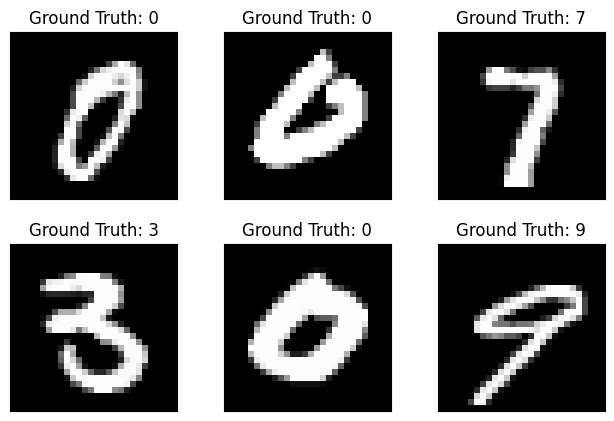

In [29]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

Define the network.  This is a more typical way to define a network than the sequential structure.  We define a class for the network, and define the parameters in the constructor.  Then we use a function called forward to actually run the network.  It's easy to see how you might use residual connections in this format.

In [30]:
from os import X_OK
# TODO Change this class to implement
# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

# Replace this class which implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3)
        # Dropout for convolutions
        self.drop = nn.Dropout2d()
        # Fully connected layer
        self.fc1 = nn.Linear(338, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.drop(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.log_softmax(x)
        return x






In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # 1. First convolution layer: 1 input channel, 10 output channels, kernel size 5
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)

        # 2. Max pooling over a 2x2 area
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 4. Second convolution layer: 10 input channels, 20 output channels, kernel size 5
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)

        # 5. 2D Dropout layer
        self.dropout2d = nn.Dropout2d()

        # 6. Second max pooling over a 2x2 area
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 9. Fully connected layer mapping from (calculated flattened dimension) to 50
        # The flattened size after the two convolution layers and pooling layers is 320 (calculated based on input image size)
        self.fc1 = nn.Linear(20 * 4 * 4, 50)  # Adjust this based on input size (e.g., for 28x28 input, it's 20*4*4 after layers)

        # 11. Fully connected layer mapping from 50 to 10 dimensions (output classes)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # 1. First convolution with ReLU
        x = F.relu(self.conv1(x))

        # 2. Max pooling
        x = self.pool1(x)

        # 4. Second convolution with ReLU
        x = F.relu(self.conv2(x))

        # 5. Apply 2D dropout
        x = self.dropout2d(x)

        # 6. Max pooling
        x = self.pool2(x)

        # 8. Flattening operation
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers

        # 9. Fully connected layer to 50 with ReLU
        x = F.relu(self.fc1(x))

        # 11. Fully connected layer to 10 (output)
        x = self.fc2(x)

        # 12. Softmax function for final output
        x = F.log_softmax(x, dim=1)

        return x


In [32]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [33]:
# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [34]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [35]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [36]:
# Get initial performance
test()
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 2.3564, Accuracy: 1224/10000 (12%)

Train Epoch: 1 [0/60000]	Loss: 2.563355
Train Epoch: 1 [640/60000]	Loss: 2.249704
Train Epoch: 1 [1280/60000]	Loss: 2.015469
Train Epoch: 1 [1920/60000]	Loss: 1.948060
Train Epoch: 1 [2560/60000]	Loss: 1.726671
Train Epoch: 1 [3200/60000]	Loss: 1.161673
Train Epoch: 1 [3840/60000]	Loss: 1.443252
Train Epoch: 1 [4480/60000]	Loss: 1.251866
Train Epoch: 1 [5120/60000]	Loss: 0.948016
Train Epoch: 1 [5760/60000]	Loss: 0.719584
Train Epoch: 1 [6400/60000]	Loss: 0.872490
Train Epoch: 1 [7040/60000]	Loss: 0.873956
Train Epoch: 1 [7680/60000]	Loss: 0.742271
Train Epoch: 1 [8320/60000]	Loss: 0.639596
Train Epoch: 1 [8960/60000]	Loss: 0.775697
Train Epoch: 1 [9600/60000]	Loss: 0.506785
Train Epoch: 1 [10240/60000]	Loss: 0.764567
Train Epoch: 1 [10880/60000]	Loss: 0.614443
Train Epoch: 1 [11520/60000]	Loss: 0.788521
Train Epoch: 1 [12160/60000]	Loss: 0.374253
Train Epoch: 1 [12800/60000]	Loss: 0.671296
Train Epoch: 1 [13440/60000]	Loss: 0.7

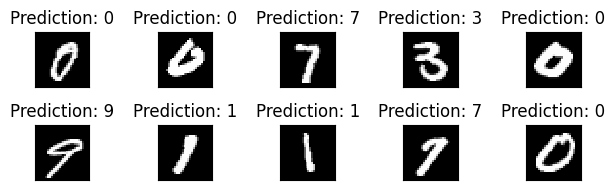

In [37]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()